In [1]:
#pip install vaderSentiment
#pip install frites
#pip uninstall scipy


In [2]:
#pip install scipy==1.8.1

In [3]:
import pandas as pd
from pickle import load
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.signal import correlate
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import coint
from jsondataset import files_in_directory
from tqdm import tqdm
tqdm.pandas()
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import xarray as xr
#from frites.conn import conn_ccf
#from frites import set_mpl_style
import matplotlib.pyplot as plt
#set_mpl_style()
import statsmodels.api as sm
from matplotlib import rcParams
from jsondataset import files_in_directory


In [2]:
#load cleaned tweets
file_list, _ = files_in_directory('tweets_extracted')
#df_tweets = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/tweets_cleanedv2.csv', low_memory=False, lineterminator='\n')
#df_tweets.head()
df_tweets=pd.DataFrame()
for file in tqdm(file_list):
    print(file)
    if file[-4:]=='.csv':
        df_new = pd.read_csv(file, low_memory=False, lineterminator='\n')
        df_tweets = pd.concat([df_new, df_tweets])

df_tweets

  0%|                                                    | 0/14 [00:00<?, ?it/s]

tweets_extracted/tweets_cleanedv3.1000.csv


  7%|███▏                                        | 1/14 [00:17<03:46, 17.42s/it]

tweets_extracted/tweets_cleanedv3.3000.csv


 14%|██████▎                                     | 2/14 [00:32<03:12, 16.02s/it]

tweets_extracted/.DS_Store
tweets_extracted/tweets_cleanedv3.7000.csv


 29%|████████████▌                               | 4/14 [00:48<01:51, 11.15s/it]

tweets_extracted/tweets_cleanedv3.10000.csv


 36%|███████████████▋                            | 5/14 [01:08<02:04, 13.78s/it]

tweets_extracted/tweets_cleanedv3.9000.csv


 43%|██████████████████▊                         | 6/14 [01:29<02:07, 15.89s/it]

tweets_extracted/tweets_cleanedv3.12000.csv


 50%|██████████████████████                      | 7/14 [01:53<02:09, 18.52s/it]

tweets_extracted/tweets_cleanedv3.5000.csv


 57%|█████████████████████████▏                  | 8/14 [02:29<02:23, 23.86s/it]

tweets_extracted/tweets_cleanedv3.12226.csv


 64%|████████████████████████████▎               | 9/14 [02:40<01:39, 19.81s/it]

tweets_extracted/tweets_cleanedv3.2000.csv


 71%|██████████████████████████████▋            | 10/14 [03:31<01:57, 29.26s/it]

tweets_extracted/tweets_cleanedv3.6000.csv


 79%|█████████████████████████████████▊         | 11/14 [04:12<01:37, 32.66s/it]

tweets_extracted/tweets_cleanedv3.11000.csv


 86%|████████████████████████████████████▊      | 12/14 [05:31<01:33, 46.86s/it]

tweets_extracted/tweets_cleanedv3.8000.csv


 93%|███████████████████████████████████████▉   | 13/14 [06:26<00:49, 49.20s/it]

tweets_extracted/tweets_cleanedv3.4000.csv


100%|███████████████████████████████████████████| 14/14 [07:16<00:00, 31.15s/it]


,Unnamed: 0,date,content,user,hashtags,coordinates,product,replyCount,retweetCount,likeCount,quoteCount,place,just_date,nltk_texts
0,0,2019-04-15 20:49:02+00:00,positive narrative nothing whether be eu fiat ...,"{'username': 'Benjiffy', 'id': 341417046, 'dis...",['MMT'],"{'longitude': -1.2652424, 'latitude': 54.510978}",economy,0.0,0.0,0.0,0.0,"{'fullName': 'Stainton, England', 'name': 'Sta...",2019-04-15,"<Text: That ""positive narrative"" has nothing t..."
1,1,2019-04-15 18:58:06+00:00,study economic school ' decide loyle carner vi...,"{'username': 'PakisRights', 'id': 997408332, '...",NaN,"{'longitude': -1.706057, 'latitude': 53.7363694}",economy,0.0,2.0,25.0,0.0,"{'fullName': 'Leeds, England', 'name': 'Leeds'...",2019-04-15,"<Text: Having studied economics at school, I’v..."
2,2,2019-04-15 18:45:58+00:00,mikegalsworthy miserable year divide uk plainl...,"{'username': 'lesleyanne14', 'id': 86527077, '...",NaN,"{'longitude': -1.4321514, 'latitude': 52.6882232}",economy,0.0,0.0,4.0,0.0,"{'fullName': 'Heather, England', 'name': 'Heat...",2019-04-15,<Text: @mikegalsworthy It has been a miserable...
3,3,2019-04-15 17:59:38+00:00,johnonnn see everything wrong prat take holy t...,"{'username': 'peteswaves', 'id': 145627856, 'd...",NaN,"{'longitude': -1.8519024, 'latitude': 51.535198}",economy,0.0,0.0,0.0,0.0,"{'fullName': 'Swindon, England', 'name': 'Swin...",2019-04-15,<Text: @Johnonnn I see everything wrong with a...
4,4,2019-04-15 17:46:57+00:00,enjoy aacsb icam reception lot talk adam smith...,"{'username': 'UofGJohnFinch', 'id': 20659961, ...",['ICAM2019'],"{'longitude': -3.21003311, 'latitude': 55.9459...",economy,0.0,0.0,6.0,0.0,"{'fullName': 'Edinburgh, Scotland', 'name': 'E...",2019-04-15,"<Text: Enjoying @AACSB #ICAM2019 reception, lo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897856,46,2022-05-18 07:02:08+00:00,would like ifs give context much would cost in...,"{'username': 'addicted2strava', 'id': 94279056...","['CostOfLivingCrisis', 'PublicSector', 'inflat...","{'longitude': -0.2158076, 'latitude': 53.7335558}",economy,0.0,0.0,0.0,0.0,"{'fullName': 'Hedon, England', 'name': 'Hedon'...",2022-05-18,<Text: I'd like @ifs to give some context as...>
897857,47,2022-05-18 06:25:08+00:00,dollar blame game ' stop continue ' matter ' p...,"{'username': 'ShinwarayAsad', 'id': 7302893468...","['economy', 'dollar', 'stockmarketcrash']","{'longitude': -3.64063699761414, 'latitude': 5...",economy,0.0,0.0,1.0,0.0,"{'fullName': 'North West, England', 'name': 'N...",2022-05-18,<Text: Dollar in 200. And the blame game won’t...
897858,48,2022-05-18 05:51:45+00:00,brexitisadisaster apparently economy back pre ...,"{'username': 'AdamConlon15', 'id': 14073040493...","['BrexitIsADisaster', 'BrexitReality', 'Brexit...","{'longitude': -2.319934, 'latitude': 53.343623}",economy,0.0,3.0,9.0,0.0,"{'fullName': 'Manchester, England', 'name': 'M...",2022-05-18,<Text: #BrexitIsADisaster apparently 😂😂😂😂 \n\n...
897859,49,2022-05-18 04:47:24+00:00,stevengwalker government issue amount money pa...,"{'username': 'Odin2001iom', 'id': 318411384, '...",['MMT'],"{'longitude': -2.56475248726412, 'latitude': 5...",economy,1.0,0.0,1.0,0.0,"{'fullName': 'Yorkshire and The Humber, Englan...",2022-05-18,<Text: @StevenGWalker74 Government can issue a...


In [3]:
df_tweets.drop(columns=['Unnamed: 0'], axis=1)

,date,content,user,hashtags,coordinates,product,replyCount,retweetCount,likeCount,quoteCount,place,just_date,nltk_texts
0,2019-04-15 20:49:02+00:00,positive narrative nothing whether be eu fiat ...,"{'username': 'Benjiffy', 'id': 341417046, 'dis...",['MMT'],"{'longitude': -1.2652424, 'latitude': 54.510978}",economy,0.0,0.0,0.0,0.0,"{'fullName': 'Stainton, England', 'name': 'Sta...",2019-04-15,"<Text: That ""positive narrative"" has nothing t..."
1,2019-04-15 18:58:06+00:00,study economic school ' decide loyle carner vi...,"{'username': 'PakisRights', 'id': 997408332, '...",NaN,"{'longitude': -1.706057, 'latitude': 53.7363694}",economy,0.0,2.0,25.0,0.0,"{'fullName': 'Leeds, England', 'name': 'Leeds'...",2019-04-15,"<Text: Having studied economics at school, I’v..."
2,2019-04-15 18:45:58+00:00,mikegalsworthy miserable year divide uk plainl...,"{'username': 'lesleyanne14', 'id': 86527077, '...",NaN,"{'longitude': -1.4321514, 'latitude': 52.6882232}",economy,0.0,0.0,4.0,0.0,"{'fullName': 'Heather, England', 'name': 'Heat...",2019-04-15,<Text: @mikegalsworthy It has been a miserable...
3,2019-04-15 17:59:38+00:00,johnonnn see everything wrong prat take holy t...,"{'username': 'peteswaves', 'id': 145627856, 'd...",NaN,"{'longitude': -1.8519024, 'latitude': 51.535198}",economy,0.0,0.0,0.0,0.0,"{'fullName': 'Swindon, England', 'name': 'Swin...",2019-04-15,<Text: @Johnonnn I see everything wrong with a...
4,2019-04-15 17:46:57+00:00,enjoy aacsb icam reception lot talk adam smith...,"{'username': 'UofGJohnFinch', 'id': 20659961, ...",['ICAM2019'],"{'longitude': -3.21003311, 'latitude': 55.9459...",economy,0.0,0.0,6.0,0.0,"{'fullName': 'Edinburgh, Scotland', 'name': 'E...",2019-04-15,"<Text: Enjoying @AACSB #ICAM2019 reception, lo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897856,2022-05-18 07:02:08+00:00,would like ifs give context much would cost in...,"{'username': 'addicted2strava', 'id': 94279056...","['CostOfLivingCrisis', 'PublicSector', 'inflat...","{'longitude': -0.2158076, 'latitude': 53.7335558}",economy,0.0,0.0,0.0,0.0,"{'fullName': 'Hedon, England', 'name': 'Hedon'...",2022-05-18,<Text: I'd like @ifs to give some context as...>
897857,2022-05-18 06:25:08+00:00,dollar blame game ' stop continue ' matter ' p...,"{'username': 'ShinwarayAsad', 'id': 7302893468...","['economy', 'dollar', 'stockmarketcrash']","{'longitude': -3.64063699761414, 'latitude': 5...",economy,0.0,0.0,1.0,0.0,"{'fullName': 'North West, England', 'name': 'N...",2022-05-18,<Text: Dollar in 200. And the blame game won’t...
897858,2022-05-18 05:51:45+00:00,brexitisadisaster apparently economy back pre ...,"{'username': 'AdamConlon15', 'id': 14073040493...","['BrexitIsADisaster', 'BrexitReality', 'Brexit...","{'longitude': -2.319934, 'latitude': 53.343623}",economy,0.0,3.0,9.0,0.0,"{'fullName': 'Manchester, England', 'name': 'M...",2022-05-18,<Text: #BrexitIsADisaster apparently 😂😂😂😂 \n\n...
897859,2022-05-18 04:47:24+00:00,stevengwalker government issue amount money pa...,"{'username': 'Odin2001iom', 'id': 318411384, '...",['MMT'],"{'longitude': -2.56475248726412, 'latitude': 5...",economy,1.0,0.0,1.0,0.0,"{'fullName': 'Yorkshire and The Humber, Englan...",2022-05-18,<Text: @StevenGWalker74 Government can issue a...


In [4]:
df_tweets = df_tweets[['just_date', 'content', 'product', 'place', 'coordinates', 'nltk_texts']]

In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10961992 entries, 0 to 897860
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   just_date    object
 1   content      object
 2   product      object
 3   place        object
 4   coordinates  object
 5   nltk_texts   object
dtypes: object(6)
memory usage: 585.4+ MB


In [7]:
pip install -U scikit-learn

     |████████████████████████████████| 8.7 MB 7.4 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
#classify tweets using saved model
loaded_model = load(open('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/Training/finalized_model.sav', 'rb'))
X_tweets = df_tweets.content.astype(str).array
y_tweets = loaded_model.predict(X_tweets)
y_prob = loaded_model.predict_proba(X_tweets)

In [9]:
df_tweets['sentiment_model'] = y_tweets
df_tweets['sentiment_model_prob_neg'] = y_prob[:,0]
df_tweets['sentiment_model_prob_neut'] = y_prob[:,1]
df_tweets['sentiment_model_prob_pos'] = y_prob[:,2]

/var/folders/sq/n25q9qhd7752nx9kc39xhkc40000gn/T/ipykernel_62541/3209136482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['sentiment_model'] = y_tweets
/var/folders/sq/n25q9qhd7752nx9kc39xhkc40000gn/T/ipykernel_62541/3209136482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['sentiment_model_prob_neg'] = y_prob[:,0]
/var/folders/sq/n25q9qhd7752nx9kc39xhkc40000gn/T/ipykernel_62541/3209136482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [10]:
df_tweets.groupby([ 'product', 'sentiment_model'])['just_date'].count()


product          sentiment_model
10DowningStreet  neg                 1257
                 neut                3983
                 pos                  722
3M               neg                 7196
                 neut                8547
                                    ...  
thetimes         neut               92312
                 pos                10067
uk               neg                61804
                 neut               93610
                 pos                38579
Name: just_date, Length: 354, dtype: int64

In [ ]:
'''df_tweets['sentiment_model'] = y_tweets
df_tweets['sentiment_model_prob_neg'] = y_prob[:,0]
df_tweets['sentiment_model_prob_neut'] = y_prob[:,1]
df_tweets['sentiment_model_prob_pos'] = y_prob[:,2]'''

In [ ]:
#df_tweets.groupby([ 'product', 'sentiment_model'])['date'].count()


In [124]:
df_tweets


KeyboardInterrupt



In [12]:
#For TextBlob sentiment
df_tweets = df_tweets.dropna(subset='content')
content = df_tweets['content'].astype('string')
textblob = content.progress_apply(lambda x: TextBlob(x))
sentiment = textblob.progress_apply(lambda x: x.sentiment)

100%|████████████████████████████| 10954521/10954521 [3:33:47<00:00, 854.02it/s]


In [13]:
tb_polarity = sentiment.progress_apply(lambda x: x.polarity)
tb_subjectivity = sentiment.progress_apply(lambda x: x.subjectivity)

100%|████████████████████████████| 10954521/10954521 [04:39<00:00, 39152.55it/s]


In [14]:
df_tweets = df_tweets.assign(tb_polarity = tb_polarity)
df_tweets = df_tweets.assign(tb_subjectivity = tb_subjectivity)

In [15]:
conditions = [
    (df_tweets['tb_polarity'] ==0 ), #& (df_tweets['tb_polarity'] ==0)
    (df_tweets['tb_polarity']>0),
    (df_tweets['tb_polarity']<-0)
]

values = ['neut', 'pos', 'neg']

df_tweets['tb_sentiment'] = np.select(conditions, values)

df_tweets.head()

,just_date,content,product,place,coordinates,nltk_texts,sentiment_model,sentiment_model_prob_neg,sentiment_model_prob_neut,sentiment_model_prob_pos,tb_polarity,tb_subjectivity,tb_sentiment
0,2019-04-15,positive narrative nothing whether be eu fiat ...,economy,"{'fullName': 'Stainton, England', 'name': 'Sta...","{'longitude': -1.2652424, 'latitude': 54.510978}","<Text: That ""positive narrative"" has nothing t...",neut,0.391726,0.480040,0.128234,0.227273,0.545455,pos
1,2019-04-15,study economic school ' decide loyle carner vi...,economy,"{'fullName': 'Leeds, England', 'name': 'Leeds'...","{'longitude': -1.706057, 'latitude': 53.7363694}","<Text: Having studied economics at school, I’v...",neut,0.308688,0.473753,0.217559,0.200000,0.200000,pos
2,2019-04-15,mikegalsworthy miserable year divide uk plainl...,economy,"{'fullName': 'Heather, England', 'name': 'Heat...","{'longitude': -1.4321514, 'latitude': 52.6882232}",<Text: @mikegalsworthy It has been a miserable...,neut,0.268279,0.649005,0.082716,-0.372727,0.513333,neg
3,2019-04-15,johnonnn see everything wrong prat take holy t...,economy,"{'fullName': 'Swindon, England', 'name': 'Swin...","{'longitude': -1.8519024, 'latitude': 51.535198}",<Text: @Johnonnn I see everything wrong with a...,neut,0.341798,0.621864,0.036338,-0.090909,0.350000,neg
4,2019-04-15,enjoy aacsb icam reception lot talk adam smith...,economy,"{'fullName': 'Edinburgh, Scotland', 'name': 'E...","{'longitude': -3.21003311, 'latitude': 55.9459...","<Text: Enjoying @AACSB #ICAM2019 reception, lo...",neut,0.301010,0.605884,0.093106,0.200000,0.250000,pos


In [16]:
#For Vader sentiment
sid_obj= SentimentIntensityAnalyzer()
vader_sentiment = df_tweets.content.progress_apply(lambda x: sid_obj.polarity_scores(x))


100%|█████████████████████████████| 10954521/10954521 [20:41<00:00, 8825.62it/s]


In [17]:
vd_neg = vader_sentiment.progress_apply(lambda x: x['neg'])
vd_neu = vader_sentiment.progress_apply(lambda x: x['neu'])
vd_pos = vader_sentiment.progress_apply(lambda x: x['pos'])
vd_comp = vader_sentiment.progress_apply(lambda x: x['compound'])

100%|███████████████████████████| 10954521/10954521 [00:13<00:00, 825832.92it/s]


In [18]:

df_tweets = df_tweets.assign(vd_neg=vd_neg)
df_tweets = df_tweets.assign(vd_neu=vd_neu)
df_tweets = df_tweets.assign(vd_pos=vd_pos)
df_tweets = df_tweets.assign(vd_comp=vd_comp)


In [19]:
conditions = [
    (df_tweets['vd_comp'] ==0) , #& (df_tweets['vd_comp'] ==0)
    (df_tweets['vd_comp']>0),
    (df_tweets['vd_comp']<-0)
]

values = ['neut', 'pos', 'neg']

df_tweets['vd_sentiment'] = np.select(conditions, values)

df_tweets.head()

,just_date,content,product,place,coordinates,nltk_texts,sentiment_model,sentiment_model_prob_neg,sentiment_model_prob_neut,sentiment_model_prob_pos,tb_polarity,tb_subjectivity,tb_sentiment,vd_neg,vd_neu,vd_pos,vd_comp,vd_sentiment
0,2019-04-15,positive narrative nothing whether be eu fiat ...,economy,"{'fullName': 'Stainton, England', 'name': 'Sta...","{'longitude': -1.2652424, 'latitude': 54.510978}","<Text: That ""positive narrative"" has nothing t...",neut,0.391726,0.480040,0.128234,0.227273,0.545455,pos,0.000,0.637,0.363,0.7506,pos
1,2019-04-15,study economic school ' decide loyle carner vi...,economy,"{'fullName': 'Leeds, England', 'name': 'Leeds'...","{'longitude': -1.706057, 'latitude': 53.7363694}","<Text: Having studied economics at school, I’v...",neut,0.308688,0.473753,0.217559,0.200000,0.200000,pos,0.000,0.814,0.186,0.4939,pos
2,2019-04-15,mikegalsworthy miserable year divide uk plainl...,economy,"{'fullName': 'Heather, England', 'name': 'Heat...","{'longitude': -1.4321514, 'latitude': 52.6882232}",<Text: @mikegalsworthy It has been a miserable...,neut,0.268279,0.649005,0.082716,-0.372727,0.513333,neg,0.304,0.464,0.232,-0.4215,neg
3,2019-04-15,johnonnn see everything wrong prat take holy t...,economy,"{'fullName': 'Swindon, England', 'name': 'Swin...","{'longitude': -1.8519024, 'latitude': 51.535198}",<Text: @Johnonnn I see everything wrong with a...,neut,0.341798,0.621864,0.036338,-0.090909,0.350000,neg,0.098,0.820,0.082,-0.1280,neg
4,2019-04-15,enjoy aacsb icam reception lot talk adam smith...,economy,"{'fullName': 'Edinburgh, Scotland', 'name': 'E...","{'longitude': -3.21003311, 'latitude': 55.9459...","<Text: Enjoying @AACSB #ICAM2019 reception, lo...",neut,0.301010,0.605884,0.093106,0.200000,0.250000,pos,0.000,0.849,0.151,0.4939,pos


In [5]:
df_tweets = pd.read_csv('tweets_sentiment.csv', low_memory=False, lineterminator='\n')

In [6]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
df_tweets.groupby(['product','sentiment_model']).count()['just_date']

product                  sentiment_model
10DowningStreet          neg                   1257
                         neut                  3983
                         pos                    722
3M                       neg                   7194
                         neut                  8547
                         pos                   1282
AKG                      neg                      2
                         neut                     3
                         pos                      1
AMERICAN CREW            neg                     42
                         neut                   204
                         pos                     85
ASOS                     neg                  15338
                         neut                 13304
                         pos                   7141
Aileen Quinn             neut                     1
Alcon                    neg                     24
                         neut                    67
                       

In [282]:
df_tweets_ = df_tweets[(df_tweets['product']=='geocode')|(df_tweets['product']=='any')]


In [283]:
#create monthly dataframe for sentiment for classification model
df_senti_model = df_tweets_.groupby(['just_date', 'sentiment_model']).agg({'just_date': ['count']})['just_date']
df_senti_model.columns = ['count']
df_senti_model = df_senti_model.reset_index()
df_senti_model = df_senti_model.pivot_table('count', ['just_date'], 'sentiment_model')
df_senti_model['sentiment_score'] = (df_senti_model['pos']- df_senti_model['neg'])/(df_senti_model['pos']+df_senti_model['neut']+df_senti_model['neg'])
df_senti_model.index = pd.to_datetime((df_senti_model.index))
df_senti_model_M = df_senti_model.resample(rule='M').sum()
df_senti_model_M = df_senti_model_M.drop(columns=['neg','neut','pos'])

In [284]:
#create monthly dataframe for sentiment for textblob
df_senti_tb = df_tweets_.groupby(['just_date', 'tb_sentiment']).agg({'just_date': ['count']})['just_date']
df_senti_tb.columns = ['count']
df_senti_tb = df_senti_tb.reset_index()
df_senti_tb = df_senti_tb.pivot_table('count', ['just_date'], 'tb_sentiment')
df_senti_tb['sentiment_score'] = (df_senti_tb['pos']- df_senti_tb['neg'])/(df_senti_tb['pos']+df_senti_tb['neut']+df_senti_tb['neg'])
df_senti_tb.index = pd.to_datetime((df_senti_tb.index))
df_senti_tb_M = df_senti_tb.resample(rule='M').sum()
df_senti_tb_M = df_senti_tb_M.drop(columns=['neg','neut','pos'])

In [285]:
#create monthly dataframe for sentiment for Vader
df_senti_vd = df_tweets_.groupby(['just_date', 'vd_sentiment']).agg({'just_date': ['count']})['just_date']
df_senti_vd.columns = ['count']
df_senti_vd = df_senti_vd.reset_index()
df_senti_vd = df_senti_vd.pivot_table('count', ['just_date'], 'vd_sentiment')
df_senti_vd['sentiment_score'] = (df_senti_vd['pos']- df_senti_vd['neg'])/(df_senti_vd['pos']+df_senti_vd['neut']+df_senti_vd['neg'])
df_senti_vd.index = pd.to_datetime((df_senti_vd.index))
df_senti_vd_M = df_senti_vd.resample(rule='M').sum()
df_senti_vd_M = df_senti_vd_M.drop(columns=['neg','neut','pos'])

In [286]:
df_senti_model_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2015-12-31 to 2022-08-31
Freq: M
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sentiment_score  81 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [287]:
#load published index
df_published = pd.read_csv('GfK Consumer Confidence.csv', infer_datetime_format=True)
df_published=df_published.set_index(['Date'])
df_published.index =pd.to_datetime(df_published.index, infer_datetime_format=True)

In [288]:
df_published.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2016-01-31 to 2022-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Actual  79 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [289]:
df_senti_model_M = df_senti_model_M.loc[df_senti_model_M.index > '2015-12-31']
df_senti_model_M  = df_senti_model_M.loc[df_senti_model_M.index < '2022-8-31']
df_senti_tb_M = df_senti_tb_M.loc[df_senti_tb_M.index > '2015-12-31']
df_senti_tb_M  = df_senti_tb_M.loc[df_senti_tb_M.index < '2022-8-31']
df_senti_vd_M = df_senti_vd_M.loc[df_senti_vd_M.index > '2015-12-31']
df_senti_vd_M  = df_senti_vd_M.loc[df_senti_vd_M.index < '2022-8-31']
df_published = df_published.loc[df_published.index > '2015-12-31']
df_published  = df_published.loc[df_published.index < '2022-8-31']

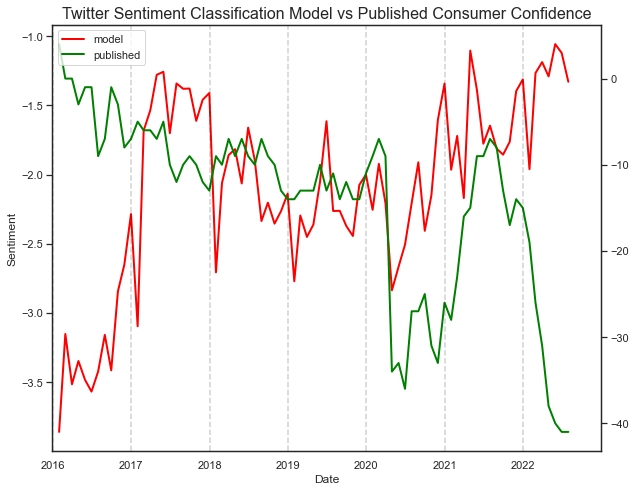

In [290]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])

ax1 = plt.subplot()
l1, = ax1.plot(df_senti_model_M,color='red', linewidth=2, label='model')
#ax2 = plt.subplot()
#l2, = ax1.plot(df_senti_tb_M,color='blue', linewidth=2, label='textblob')
#ax3 = plt.subplot()
#l3, = ax1.plot(df_senti_vd_M,color='orange', linewidth=2, label='vader')
ax2 =ax.twinx()

l4, = ax2.plot(df_published,color='green', linewidth=2,label='published')
plt.xticks(rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
plt.title('Twitter Sentiment Classification Model vs Published Consumer Confidence', fontsize=16)
plt.legend([l1,l4], ['model','published'], loc='upper left')
plt.xlim([datetime(2015, 12, 31),datetime(2022, 12, 31)])
for year in range(2010,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()


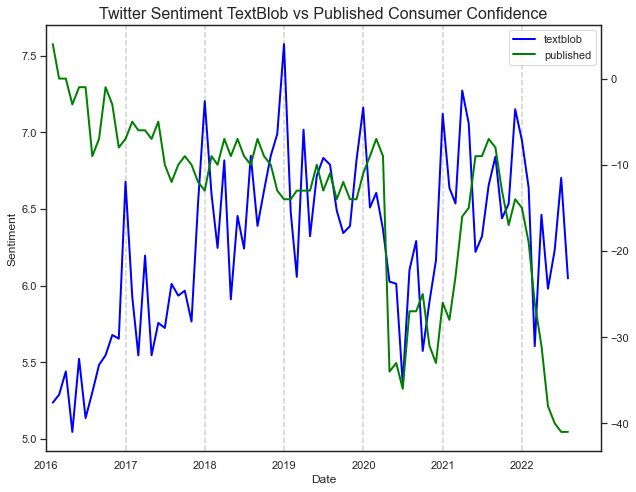

In [291]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])

ax1 = plt.subplot()
#l1, = ax1.plot(df_senti_model_M,color='red', linewidth=2, label='model')
#ax2 = plt.subplot()
l2, = ax1.plot(df_senti_tb_M,color='blue', linewidth=2, label='textblob')
#ax3 = plt.subplot()
#l3, = ax1.plot(df_senti_vd_M,color='orange', linewidth=2, label='vader')
ax2 =ax.twinx()

l4, = ax2.plot(df_published,color='green', linewidth=2,label='published')
plt.xticks(rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
plt.title('Twitter Sentiment TextBlob vs Published Consumer Confidence', fontsize=16)
plt.legend([l2, l4], [ 'textblob', 'published'], loc='upper right')
plt.xlim([datetime(2015, 12, 31),datetime(2022, 12, 31)])
for year in range(2010,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

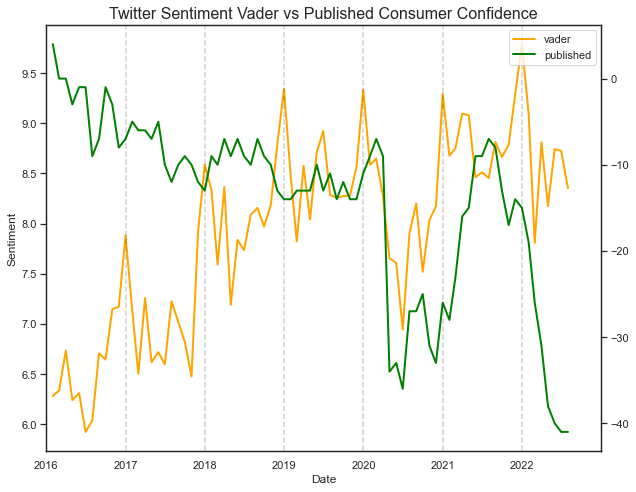

In [292]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])

ax1 = plt.subplot()
#l1, = ax1.plot(df_senti_model_M,color='red', linewidth=2, label='model')
#ax2 = plt.subplot()
#l2, = ax1.plot(df_senti_tb_M,color='blue', linewidth=2, label='textblob')
#ax3 = plt.subplot()
l3, = ax1.plot(df_senti_vd_M,color='orange', linewidth=2, label='vader')
ax2 =ax.twinx()

l4, = ax2.plot(df_published,color='green', linewidth=2,label='published')
plt.xticks(rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
plt.title('Twitter Sentiment Vader vs Published Consumer Confidence', fontsize=16)
plt.legend([l3, l4], [ 'vader', 'published'], loc='upper right')
plt.xlim([datetime(2015, 12, 31),datetime(2022, 12, 31)])
for year in range(2010,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [293]:
print(len(df_published))
print(len(df_senti_model_M))
print(len(df_senti_tb_M))
print(len(df_senti_vd_M))

79
79
79
79


In [294]:
df_all = pd.concat([df_published, df_senti_model_M], axis=1)
df_all = df_all.rename(columns = {'sentiment_score': 'model'})
df_all = pd.concat([df_all, df_senti_tb_M], axis=1)
df_all = df_all.rename(columns = {'sentiment_score': 'textblob'})
df_all = pd.concat([df_all, df_senti_vd_M], axis=1)
df_all = df_all.rename(columns = {'sentiment_score': 'vader'})

In [295]:
#df_all

In [296]:
for col in df_all.columns:
    scaled = (df_all[col]-df_all[col].min())/(df_all[col].max()-df_all[col].min())
    differences = scaled.diff()
    changes = differences.array
    changes[0] = 0
    rebased = 100 + np.cumsum(changes)
    col_name = str(col)+'_rebased'
    df_all[col_name] = rebased

df_all

,Actual,model,textblob,vader,Actual_rebased,model_rebased,textblob_rebased,vader_rebased
2016-01-31,4,-3.858913,5.236129,6.283209,100.000000,100.000000,100.000000,100.000000
2016-02-29,0,-3.151512,5.287852,6.336730,99.911111,100.252551,100.020439,100.013849
2016-03-31,0,-3.514939,5.440093,6.734520,99.911111,100.122803,100.080599,100.116777
2016-04-30,-3,-3.346729,5.045194,6.241144,99.844444,100.182856,99.924549,99.989116
2016-05-31,-1,-3.483702,5.521942,6.311001,99.888889,100.133955,100.112943,100.007191
2016-06-30,-1,-3.567560,5.135676,5.924276,99.888889,100.104016,99.960305,99.907125
2016-07-31,-9,-3.421834,5.303503,6.038584,99.711111,100.156042,100.026624,99.936703
2016-08-31,-7,-3.158035,5.482628,6.708202,99.755556,100.250222,100.097407,100.109968
2016-09-30,-1,-3.414080,5.545209,6.644853,99.888889,100.158810,100.122137,100.093576
2016-10-31,-3,-2.844238,5.677348,7.146409,99.844444,100.362251,100.174353,100.223354


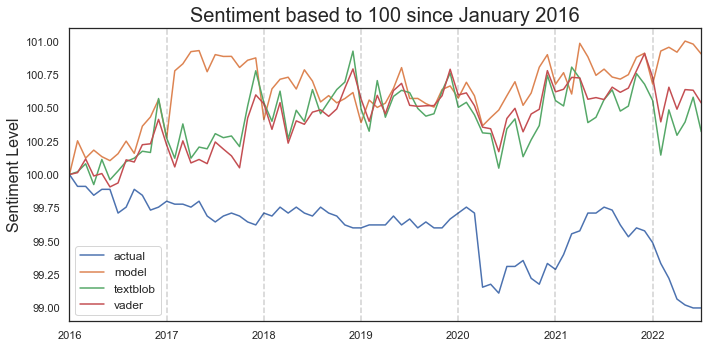

In [297]:
df_all[['Actual_rebased', 'model_rebased', 'textblob_rebased', 'vader_rebased']].plot()
plt.title('Sentiment based to 100 since January 2016', fontsize=20)
plt.ylabel('Sentiment Level', fontsize=16)
plt.legend(['actual', 'model', 'textblob', 'vader'], loc='lower left', fontsize=12)
for year in range(2015,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [298]:
df_2018 = df_all.loc[df_all.index>='2018-12-31']

In [299]:
df_2018.columns[0:4]

Index(['Actual', 'model', 'textblob', 'vader'], dtype='object')

In [300]:
for col in df_2018.columns:
    scaled = (df_2018[col]-df_2018[col].min())/(df_2018[col].max()-df_2018[col].min())
    differences = scaled.diff()
    changes = differences.array
    changes[0] = 0
    rebased = 100 + np.cumsum(changes)
    col_name = str(col)+'_rebased'
    df_2018[col_name] = rebased

df_2018

/var/folders/sq/n25q9qhd7752nx9kc39xhkc40000gn/T/ipykernel_77249/2393351308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018[col_name] = rebased
/var/folders/sq/n25q9qhd7752nx9kc39xhkc40000gn/T/ipykernel_77249/2393351308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018[col_name] = rebased
/var/folders/sq/n25q9qhd7752nx9kc39xhkc40000gn/T/ipykernel_77249/2393351308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Actual,model,textblob,vader,Actual_rebased,model_rebased,textblob_rebased,vader_rebased,Actual_rebased_rebased,model_rebased_rebased,textblob_rebased_rebased,vader_rebased_rebased
2018-12-31,-14,-2.138177,7.575795,9.340928,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-01-31,-14,-2.770734,6.480079,8.470299,100.000000,99.644226,99.506312,99.694071,100.000000,99.644226,99.506312,99.694071
2019-02-28,-13,-2.295747,6.057055,7.822449,100.029412,99.911377,99.315713,99.466425,100.029412,99.911377,99.315713,99.466425
2019-03-31,-13,-2.450591,7.017184,8.576299,100.029412,99.824286,99.748311,99.731319,100.029412,99.824286,99.748311,99.731319
2019-04-30,-13,-2.361036,6.322244,8.040826,100.029412,99.874655,99.435197,99.543159,100.029412,99.874655,99.435197,99.543159
2019-05-31,-10,-2.051151,6.717422,8.713846,100.117647,100.048947,99.613250,99.779651,100.117647,100.048947,99.613250,99.779651
2019-06-30,-13,-1.615020,6.832890,8.923137,100.029412,100.294244,99.665275,99.853193,100.029412,100.294244,99.665275,99.853193
2019-07-31,-11,-2.262998,6.789129,8.286841,100.088235,99.929796,99.645558,99.629607,100.088235,99.929796,99.645558,99.629607
2019-08-31,-14,-2.262053,6.489302,8.256860,100.000000,99.930327,99.510467,99.619071,100.000000,99.930327,99.510467,99.619071
2019-09-30,-12,-2.370559,6.342874,8.274627,100.058824,99.869300,99.444492,99.625314,100.058824,99.869300,99.444492,99.625314


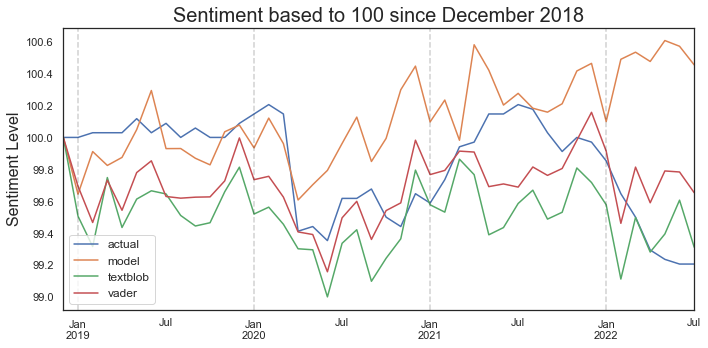

In [301]:
df_2018[['Actual_rebased', 'model_rebased', 'textblob_rebased', 'vader_rebased']].plot()
plt.title('Sentiment based to 100 since December 2018', fontsize=20)
plt.ylabel('Sentiment Level', fontsize=16)
plt.legend(['actual', 'model', 'textblob', 'vader'], loc='lower left', fontsize=12)
for year in range(2015,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

,Actual_rebased,model_rebased,textblob_rebased,vader_rebased
Actual_rebased,1.000000,-0.425550,-0.155956,-0.399785
model_rebased,-0.425550,1.000000,0.457553,0.505582
textblob_rebased,-0.155956,0.457553,1.000000,0.893953
vader_rebased,-0.399785,0.505582,0.893953,1.000000


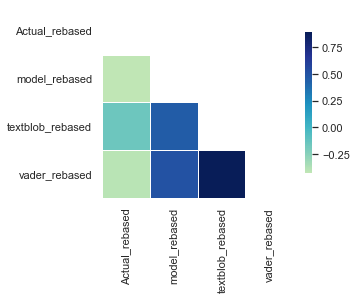

In [302]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_all[['Actual_rebased', 'model_rebased', 'textblob_rebased', 'vader_rebased']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 50, as_cmap=True)
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

,Actual_rebased,model_rebased,textblob_rebased,vader_rebased
Actual_rebased,1.000000,-0.239246,0.491313,0.351666
model_rebased,-0.239246,1.000000,0.178041,0.489220
textblob_rebased,0.491313,0.178041,1.000000,0.871755
vader_rebased,0.351666,0.489220,0.871755,1.000000


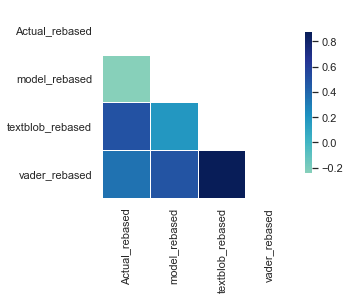

In [303]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_2018[['Actual_rebased', 'model_rebased', 'textblob_rebased', 'vader_rebased']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 50, as_cmap=True)
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

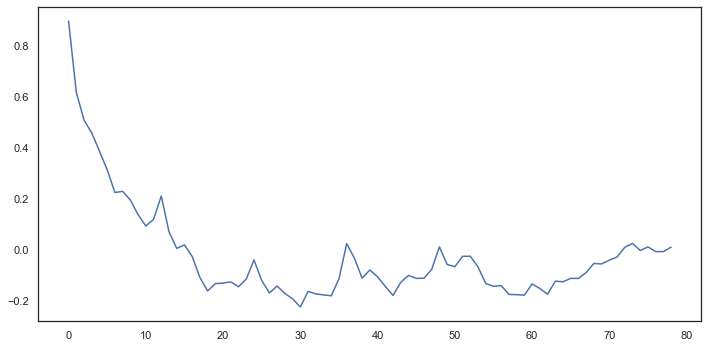

In [304]:
ccf = sm.tsa.stattools.ccf(df_all['textblob_rebased'].array, df_all['vader_rebased'].array, adjusted =False)
plt.plot(ccf)
plt.show()

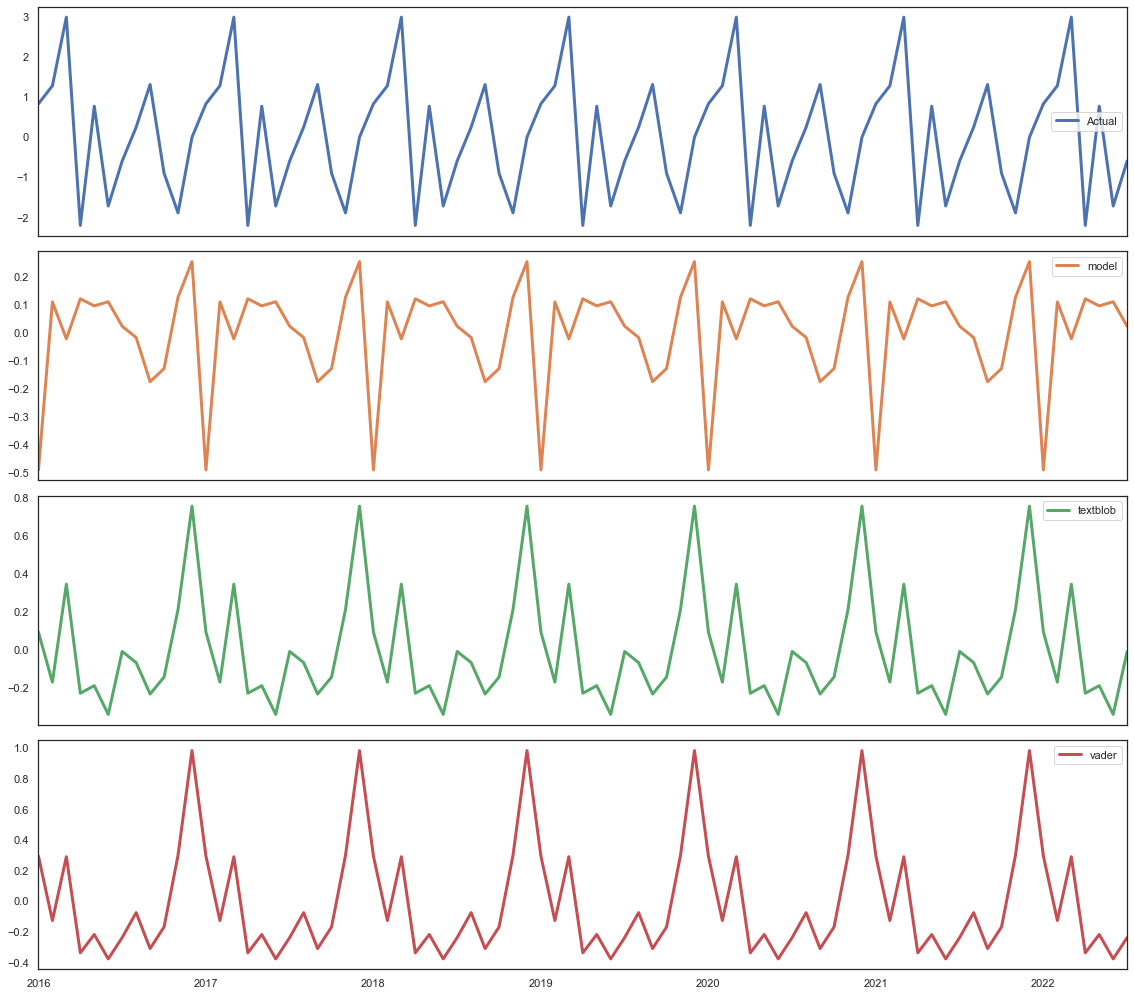

In [305]:
# Seasonality plots
seasonality_dict = {}

for ts in df_all.columns[0:4]:
    decompositions = sm.tsa.seasonal_decompose(df_all[ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict)["2015":"2022"].plot(
    subplots=True, layout=(4, 1), linewidth=3
);

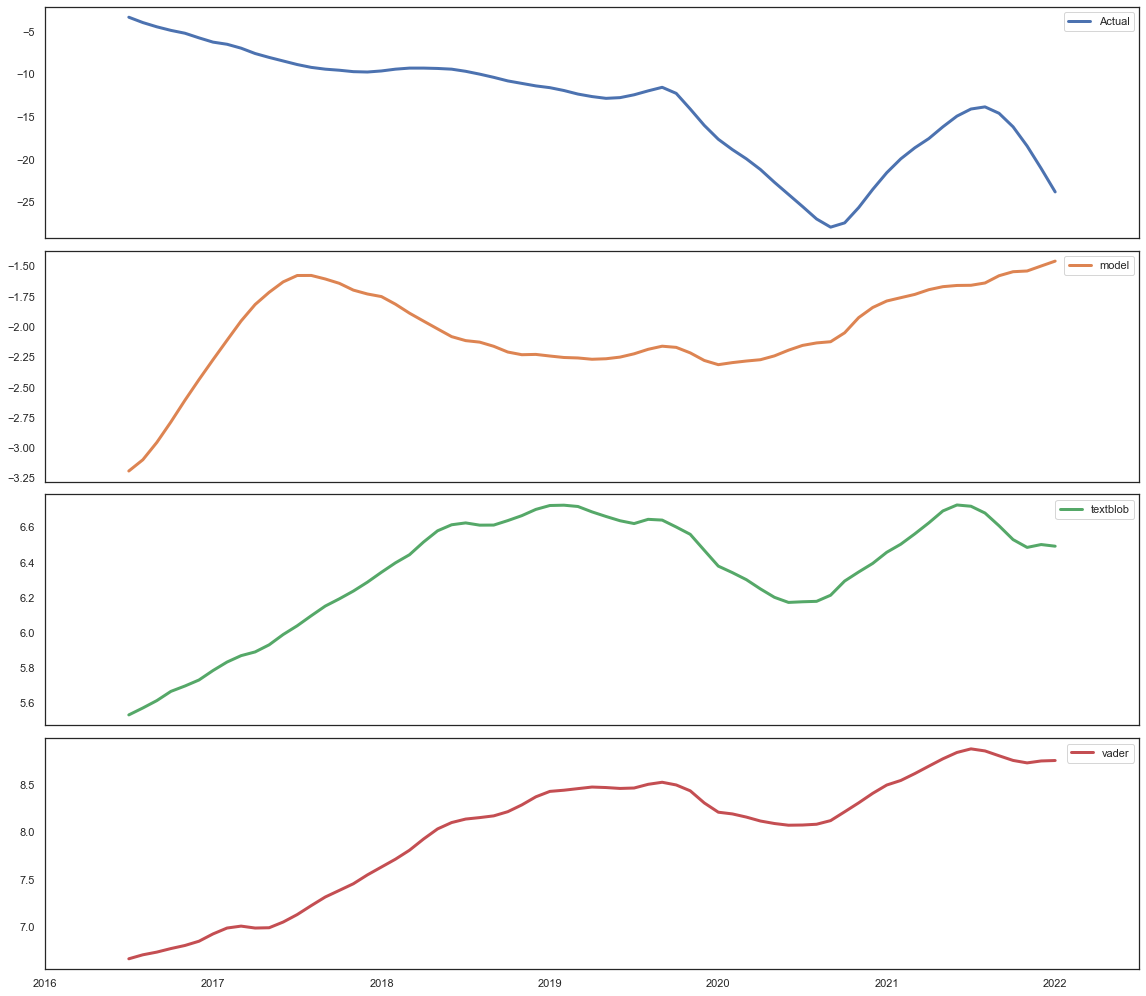

In [306]:
#trend plots
trend_dict = {}

for ts in df_all.columns[0:4]:
    decomposition = sm.tsa.seasonal_decompose(df_all[ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 1), linewidth=3);

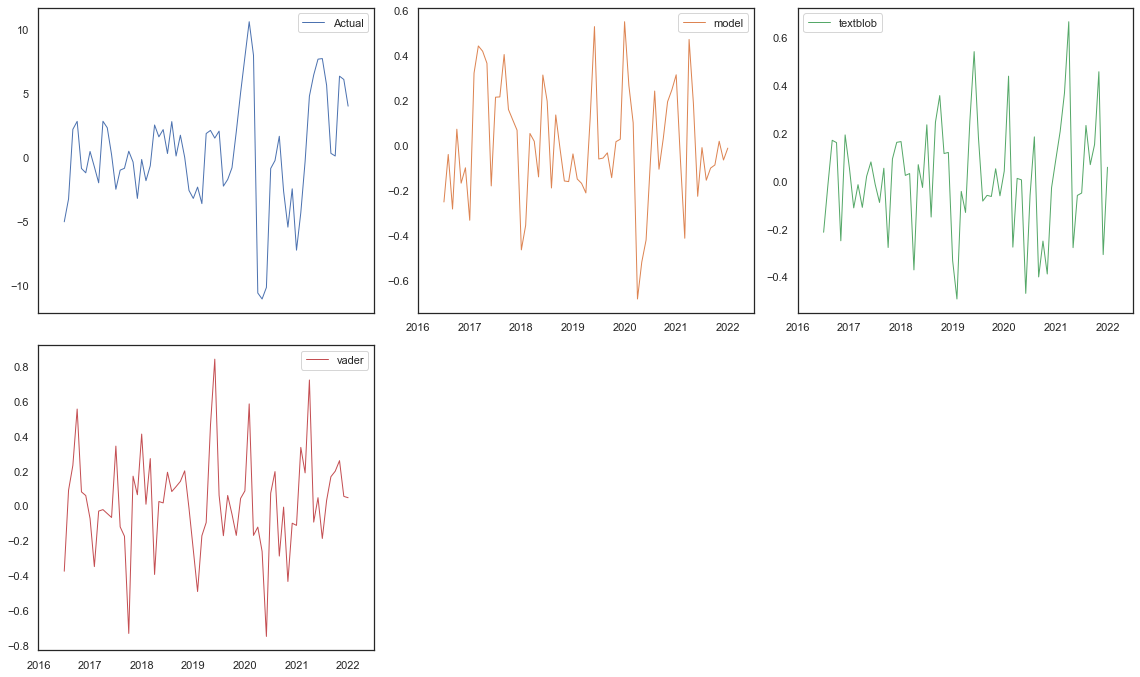

In [307]:
#noise plots
resid_dict = {}

for ts in df_all.columns[0:4]:
    decomposition = sm.tsa.seasonal_decompose(df_all[ts].dropna())
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(subplots=True, layout=(3, 3), linewidth=1);

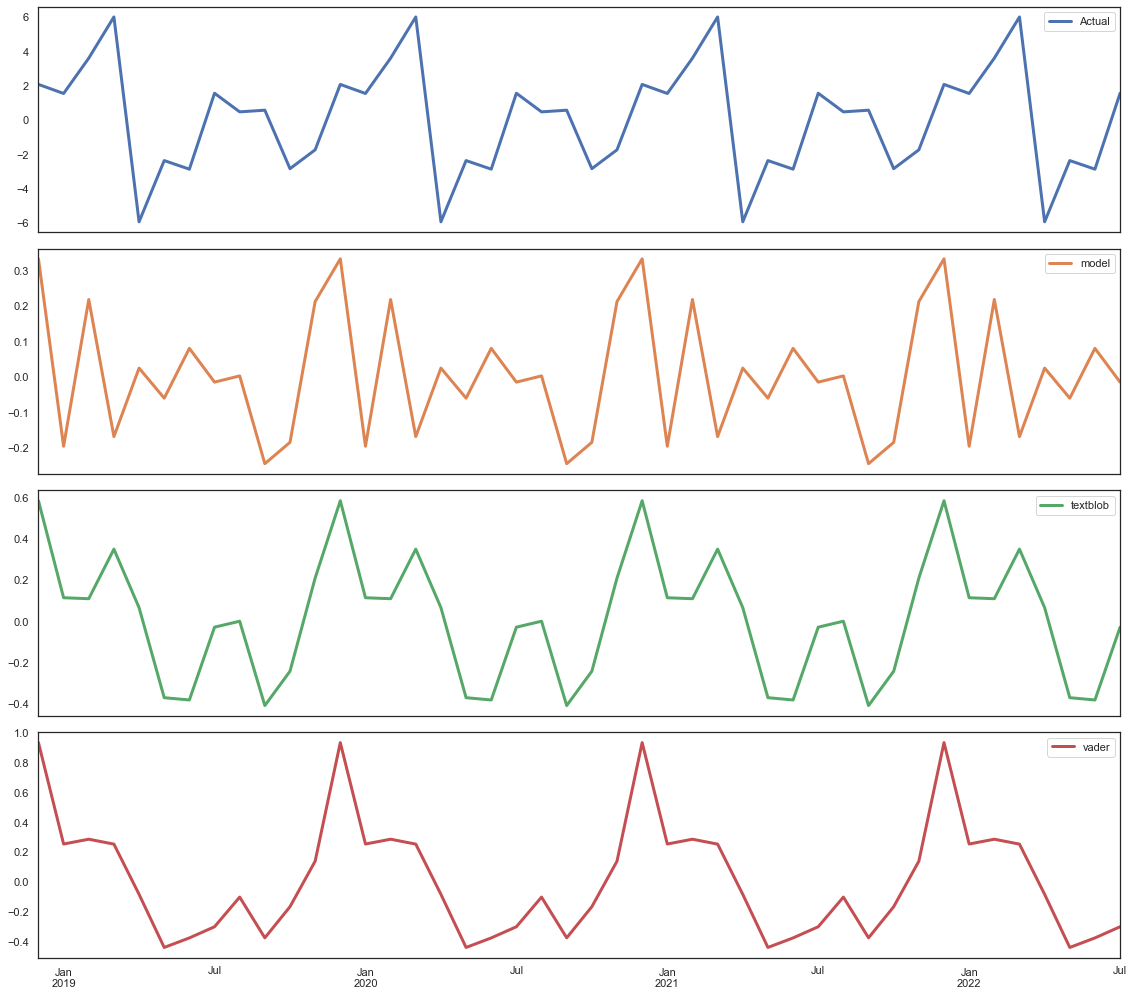

In [308]:
# seasonality plots 2018
seasonality_dict = {}

for ts in df_2018.columns[0:4]:
    decompositions = sm.tsa.seasonal_decompose(df_2018[ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict)["2018":"2022"].plot(
    subplots=True, layout=(4, 1), linewidth=3
);

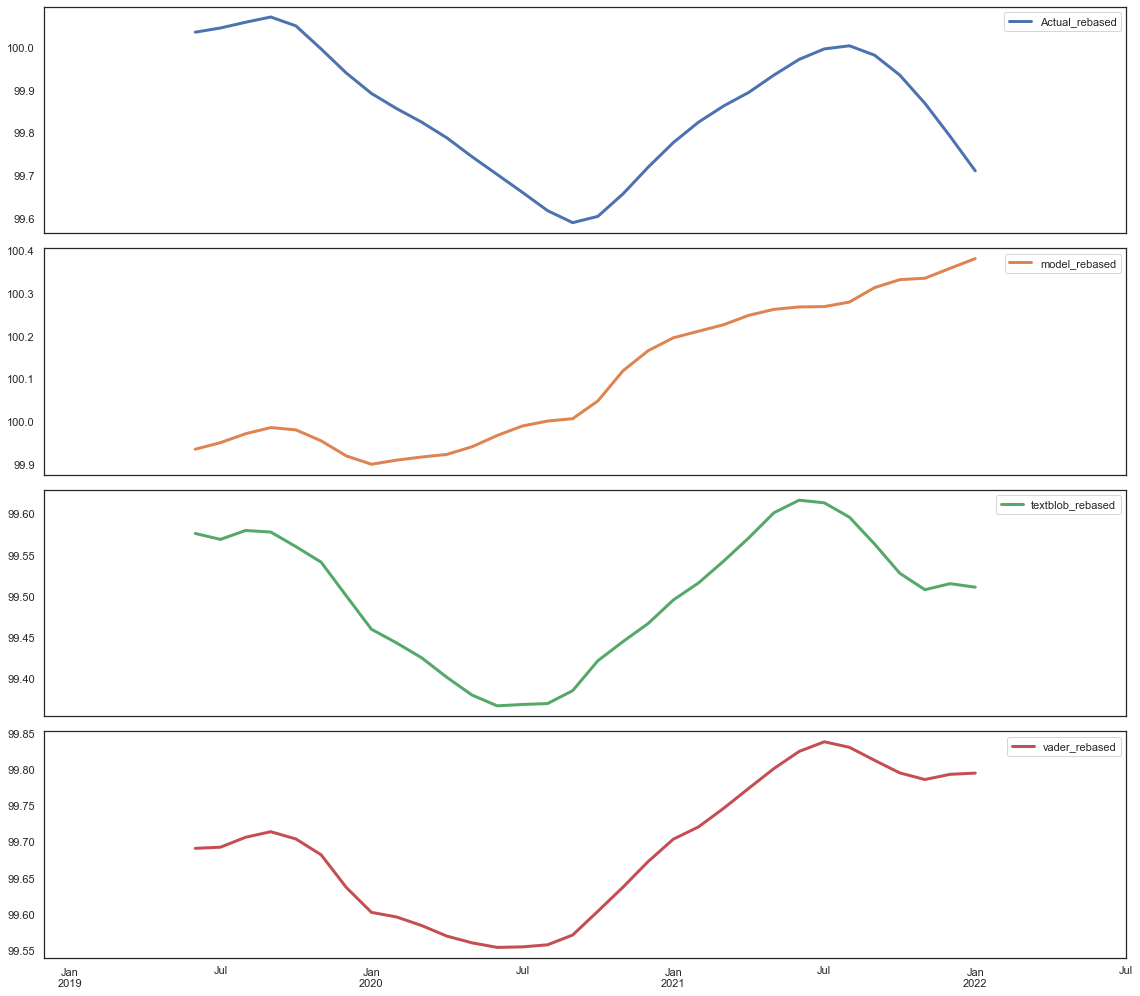

In [309]:
# trend plots 2018
trend_dict = {}

for ts in df_2018.columns[4:8]:
    decomposition = sm.tsa.seasonal_decompose(df_2018[ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 1), linewidth=3);

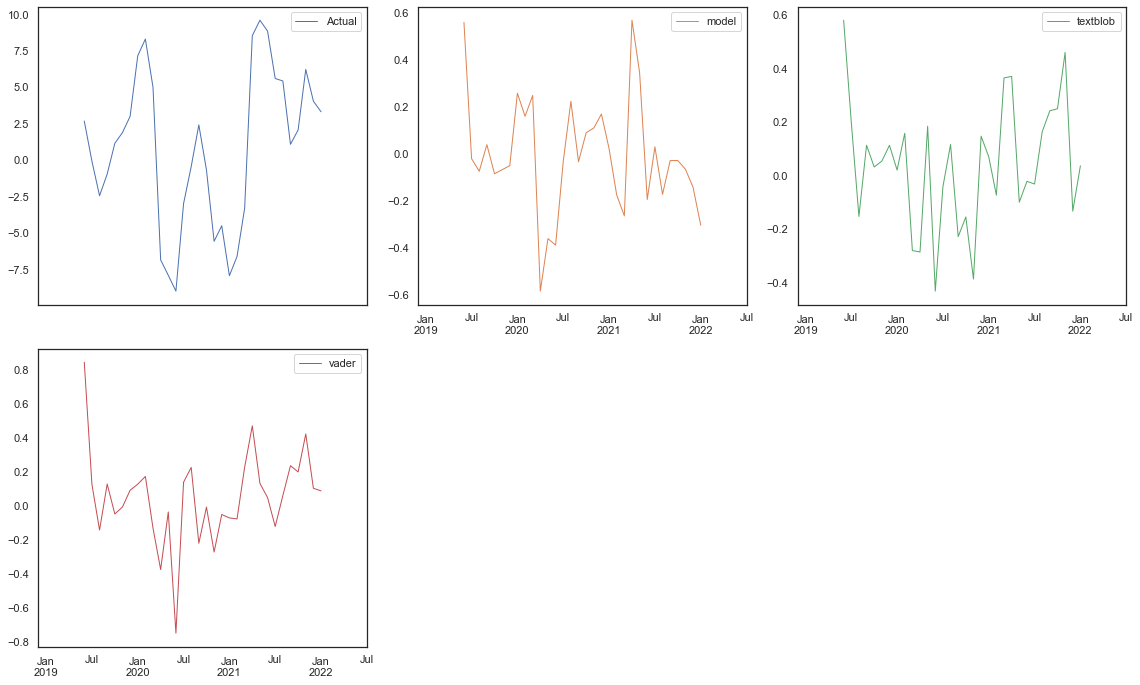

In [310]:
#noise plots 2018

resid_dict = {}

for ts in df_2018.columns[0:4]:
    decomposition = sm.tsa.seasonal_decompose(df_2018[ts].dropna())
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(subplots=True, layout=(3, 3), linewidth=1);

In [311]:
df_raw_all = df_all[['Actual_rebased', 'model_rebased', 'textblob_rebased', 'vader_rebased']]
df_2018_all = df_2018[['Actual_rebased', 'model_rebased', 'textblob_rebased', 'vader_rebased']]

/Users/shaheedismail/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


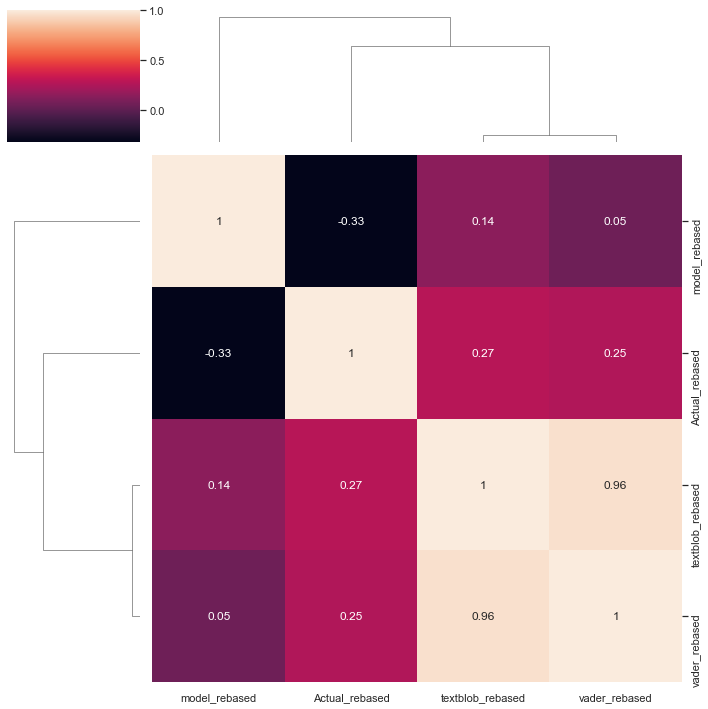

In [312]:
#cluster plot seasonality
seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(df_raw_all[ts].dropna()).seasonal for ts in df_raw_all.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

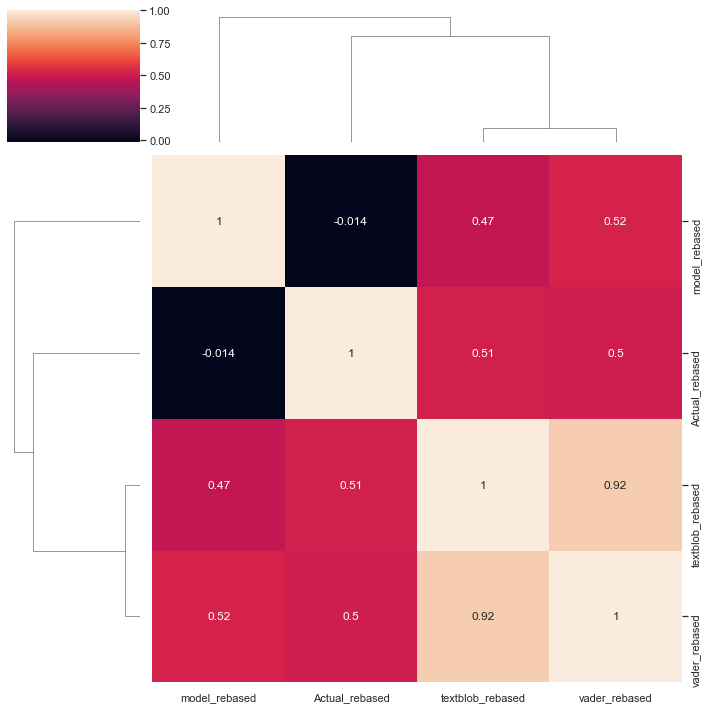

In [313]:
#cluster plot seasonality 2018
seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(df_2018_all[ts].dropna()).seasonal for ts in df_2018_all.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

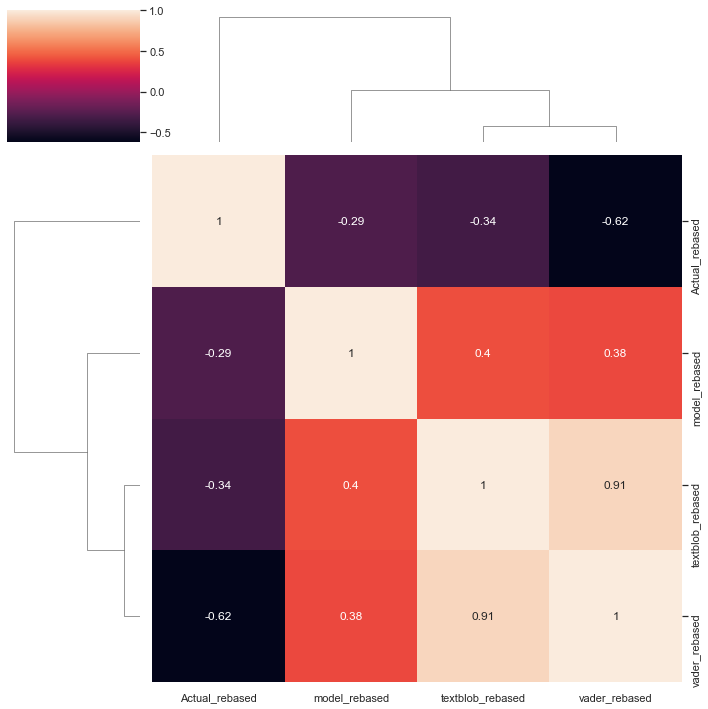

In [314]:
#cluster plot trend
trend_dict = {
    ts: sm.tsa.seasonal_decompose(df_raw_all[ts].dropna()).trend for ts in df_raw_all.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True)
plt.show();

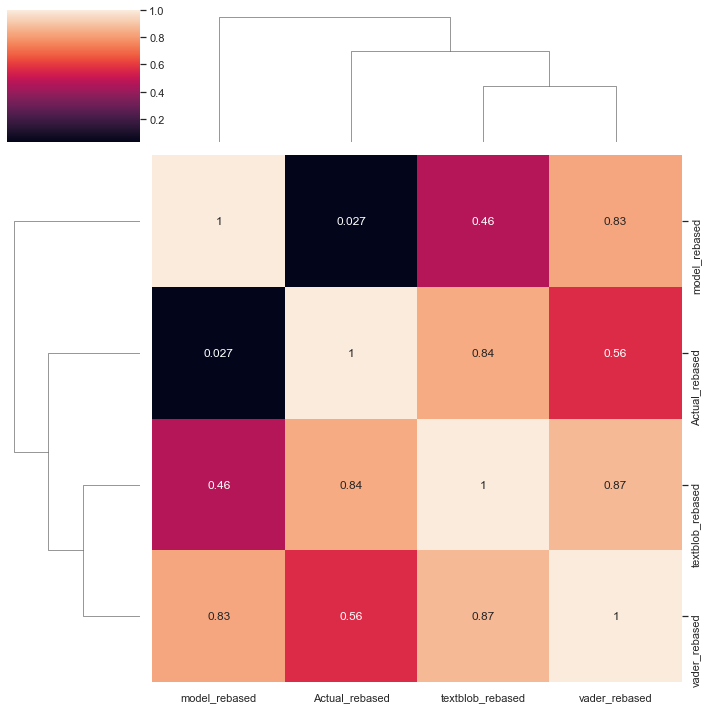

In [315]:
#cluster plot trend 2018
trend_dict = {
    ts: sm.tsa.seasonal_decompose(df_2018_all[ts].dropna()).trend for ts in df_2018_all.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True)
plt.show();

In [316]:
#create moving averages for all
#del df_all_ma
df_all_ma = df_all.copy()

actual_x = df_all['Actual_rebased']
model_x = df_all['model_rebased']
textblob_x = df_all['textblob_rebased']
vader_x = df_all['vader_rebased']


series = [actual_x, model_x, textblob_x, vader_x]
periods = [3, 6, 12, 24]
labels = ['actual', 'model', 'textblob', 'vader']
columns = []
for s in series:
    for t in periods:
        label1 = 'ma_'+s.name+'_'+str(t)
        label2 = 'ema_'+s.name+'_'+str(t)
        df_all_ma[label1] = s.rolling(t).mean()
        df_all_ma[label2] = s.ewm(span=t).mean()
        columns.append(label1)
        columns.append(label2)


df_all_ma

,Actual,model,textblob,vader,Actual_rebased,model_rebased,textblob_rebased,vader_rebased,ma_Actual_rebased_3,ema_Actual_rebased_3,ma_Actual_rebased_6,ema_Actual_rebased_6,ma_Actual_rebased_12,ema_Actual_rebased_12,ma_Actual_rebased_24,ema_Actual_rebased_24,ma_model_rebased_3,ema_model_rebased_3,ma_model_rebased_6,ema_model_rebased_6,ma_model_rebased_12,ema_model_rebased_12,ma_model_rebased_24,ema_model_rebased_24,ma_textblob_rebased_3,ema_textblob_rebased_3,ma_textblob_rebased_6,ema_textblob_rebased_6,ma_textblob_rebased_12,ema_textblob_rebased_12,ma_textblob_rebased_24,ema_textblob_rebased_24,ma_vader_rebased_3,ema_vader_rebased_3,ma_vader_rebased_6,ema_vader_rebased_6,ma_vader_rebased_12,ema_vader_rebased_12,ma_vader_rebased_24,ema_vader_rebased_24
2016-01-31,4,-3.858913,5.236129,6.283209,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000
2016-02-29,0,-3.151512,5.287852,6.336730,99.911111,100.252551,100.020439,100.013849,NaN,99.940741,NaN,99.948148,NaN,99.951852,NaN,99.953704,NaN,100.168367,NaN,100.147321,NaN,100.136798,NaN,100.131537,NaN,100.013626,NaN,100.011923,NaN,100.011071,NaN,100.010645,NaN,100.009232,NaN,100.008078,NaN,100.007501,NaN,100.007213
2016-03-31,0,-3.514939,5.440093,6.734520,99.911111,100.122803,100.080599,100.116777,99.940741,99.923810,NaN,99.931498,NaN,99.935951,NaN,99.938307,100.125118,100.142330,NaN,100.136299,NaN,100.131336,NaN,100.128380,100.033679,100.051896,NaN,100.042796,NaN,100.038208,NaN,100.035932,100.043542,100.070687,NaN,100.056943,NaN,100.050152,NaN,100.046818
2016-04-30,-3,-3.346729,5.045194,6.241144,99.844444,100.182856,99.924549,99.989116,99.888889,99.881481,NaN,99.897873,NaN,99.907066,NaN,99.911830,100.186070,100.163944,NaN,100.154282,NaN,100.147599,NaN,100.143746,100.008529,99.983978,NaN,99.997122,NaN,100.002330,NaN,100.004513,100.039914,100.027182,NaN,100.030744,NaN,100.030885,NaN,100.030542
2016-05-31,-1,-3.483702,5.521942,6.311001,99.888889,100.133955,100.112943,100.007191,99.881481,99.885305,NaN,99.894720,NaN,99.902127,NaN,99.906447,100.146538,100.148466,NaN,100.147148,NaN,100.143892,NaN,100.141449,100.039364,100.050540,NaN,100.037772,NaN,100.032383,NaN,100.029957,100.037695,100.016864,NaN,100.022478,NaN,100.024448,NaN,100.025062
2016-06-30,-1,-3.567560,5.135676,5.924276,99.888889,100.104016,99.960305,99.907125,99.874074,99.887125,99.907407,99.892799,NaN,99.898910,NaN,99.902879,100.140276,100.125888,100.132697,100.132937,NaN,100.134200,NaN,100.133841,99.999266,100.004706,100.016472,100.012248,NaN,100.014864,NaN,100.015802,99.967811,99.961124,100.005676,99.984472,NaN,99.995932,NaN,100.001094
2016-07-31,-9,-3.421834,5.303503,6.038584,99.711111,100.156042,100.026624,99.936703,99.829630,99.798425,99.859259,99.835447,NaN,99.857003,NaN,99.868182,100.131338,100.141084,100.158704,100.140231,NaN,100.139074,NaN,100.137858,100.033290,100.015751,100.020910,100.016786,NaN,100.017488,NaN,100.017760,99.950340,99.948817,99.995127,99.969393,NaN,99.982715,NaN,99.989444
2016-08-31,-7,-3.158035,5.482628,6.708202,99.755556,100.250222,100.097407,100.109968,99.785185,99.776906,99.833333,99.810962,NaN,99.835832,NaN,99.849672,100.170093,100.195867,100.158316,100.173941,NaN,100.162269,NaN,100.156325,100.028112,100.056739,100.033738,100.041495,NaN,100.034166,NaN,100.030850,99.984599,100.029708,100.011147,100.012477,NaN,100.009271,NaN,100.009251
2016-09-30,-1,-3.414080,5.545209,6.644853,99.888889,100.158810,100.122137,100.093576,99.785185,99.833007,99.829630,99.834359,NaN,99.846329,NaN,99.855616,100.188358,100.177302,100.164317,100.169398,NaN,100.161585,NaN,100.156701,100.082056,100.089502,100.040661,100.065707,NaN,100.051570,NaN,100.044685,100.046749,100.061705,100.007280,100.036827,NaN,100.025949,NaN,100.022031
2016-10-31,-3,-2.844238,5.677348,7.146409,99.844444,100.362251,100.174

<AxesSubplot:>

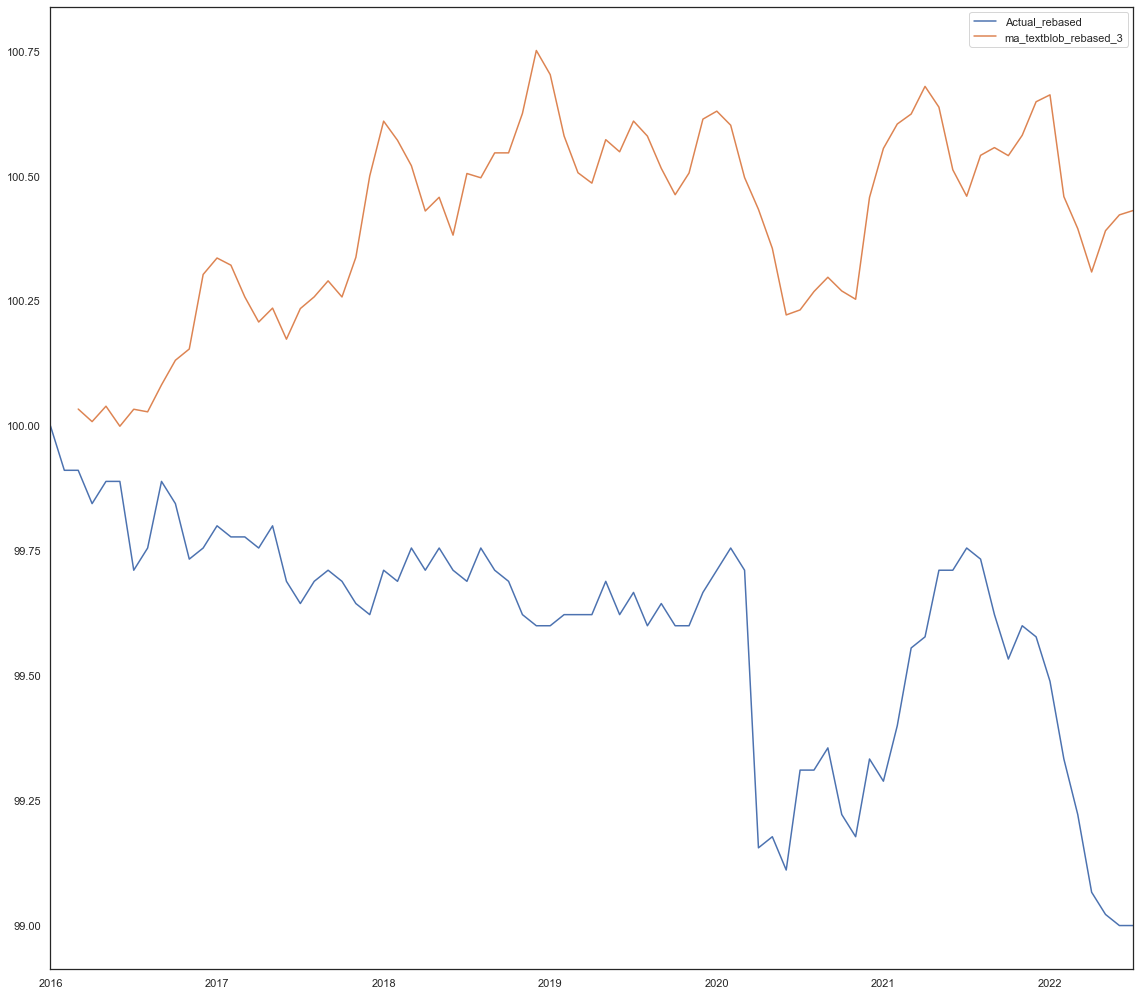

In [317]:
select = ['Actual_rebased', 'ma_textblob_rebased_3']
df_all_ma[df_all_ma.columns.intersection(select)].plot()


<AxesSubplot:>

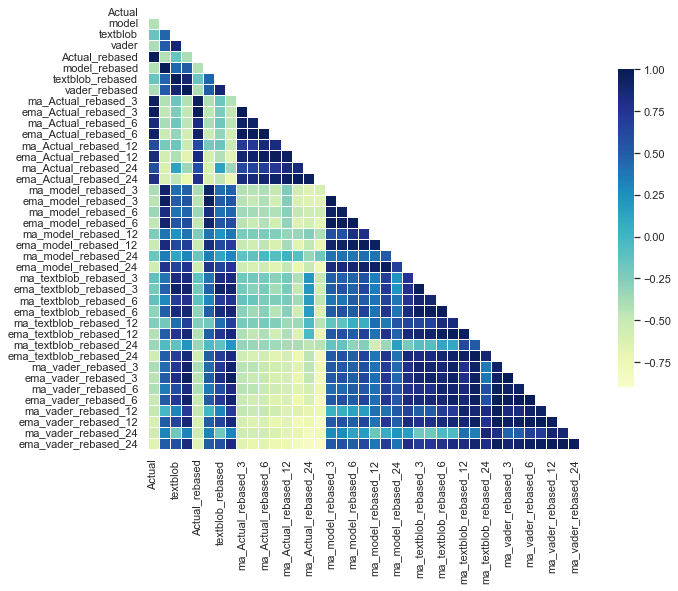

In [318]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_all_ma.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 50, as_cmap=True)
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [319]:
corr.Actual_rebased

Actual                     1.000000
model                     -0.425550
textblob                  -0.155956
vader                     -0.399785
Actual_rebased             1.000000
model_rebased             -0.425550
textblob_rebased          -0.155956
vader_rebased             -0.399785
ma_Actual_rebased_3        0.948519
ema_Actual_rebased_3       0.973595
ma_Actual_rebased_6        0.846102
ema_Actual_rebased_6       0.921298
ma_Actual_rebased_12       0.605246
ema_Actual_rebased_12      0.846090
ma_Actual_rebased_24       0.597424
ema_Actual_rebased_24      0.789955
ma_model_rebased_3        -0.397523
ema_model_rebased_3       -0.456257
ma_model_rebased_6        -0.347349
ema_model_rebased_6       -0.479300
ma_model_rebased_12       -0.248407
ema_model_rebased_12      -0.517496
ma_model_rebased_24       -0.177466
ema_model_rebased_24      -0.562144
ma_textblob_rebased_3     -0.127072
ema_textblob_rebased_3    -0.214266
ma_textblob_rebased_6     -0.130566
ema_textblob_rebased_6    -0

In [320]:
#create moving averages
#del df_2018_ma
df_2018_ma = df_2018.copy()

actual_x = df_2018['Actual_rebased']
model_x = df_2018['model_rebased']
textblob_x = df_2018['textblob_rebased']
vader_x = df_2018['vader_rebased']


series = [actual_x, model_x, textblob_x, vader_x]
periods = [3, 6, 12, 24]
labels = ['actual', 'model', 'textblob', 'vader']
columns = []
for s in series:
    for t in periods:
        label1 = 'ma_'+s.name+'_'+str(t)
        label2 = 'ema_'+s.name+'_'+str(t)
        df_2018_ma[label1] = s.rolling(t).mean()
        df_2018_ma[label2] = s.ewm(span=t).mean()
        columns.append(label1)
        columns.append(label2)


df_2018_ma

,Actual,model,textblob,vader,Actual_rebased,model_rebased,textblob_rebased,vader_rebased,Actual_rebased_rebased,model_rebased_rebased,textblob_rebased_rebased,vader_rebased_rebased,ma_Actual_rebased_3,ema_Actual_rebased_3,ma_Actual_rebased_6,ema_Actual_rebased_6,ma_Actual_rebased_12,ema_Actual_rebased_12,ma_Actual_rebased_24,ema_Actual_rebased_24,ma_model_rebased_3,ema_model_rebased_3,ma_model_rebased_6,ema_model_rebased_6,ma_model_rebased_12,ema_model_rebased_12,ma_model_rebased_24,ema_model_rebased_24,ma_textblob_rebased_3,ema_textblob_rebased_3,ma_textblob_rebased_6,ema_textblob_rebased_6,ma_textblob_rebased_12,ema_textblob_rebased_12,ma_textblob_rebased_24,ema_textblob_rebased_24,ma_vader_rebased_3,ema_vader_rebased_3,ma_vader_rebased_6,ema_vader_rebased_6,ma_vader_rebased_12,ema_vader_rebased_12,ma_vader_rebased_24,ema_vader_rebased_24
2018-12-31,-14,-2.138177,7.575795,9.340928,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000
2019-01-31,-14,-2.770734,6.480079,8.470299,100.000000,99.644226,99.506312,99.694071,100.000000,99.644226,99.506312,99.694071,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,99.762817,NaN,99.792465,NaN,99.807289,NaN,99.814701,NaN,99.670875,NaN,99.712015,NaN,99.732586,NaN,99.742871,NaN,99.796048,NaN,99.821542,NaN,99.834289,NaN,99.840662
2019-02-28,-13,-2.295747,6.057055,7.822449,100.029412,99.911377,99.315713,99.466425,100.029412,99.911377,99.315713,99.466425,100.009804,100.016807,NaN,100.013222,NaN,100.011479,NaN,100.010632,99.851867,99.847708,NaN,99.845921,NaN,99.847914,NaN,99.849647,99.607342,99.467925,NaN,99.533861,NaN,99.569880,NaN,99.588461,99.720165,99.607692,NaN,99.661902,NaN,99.690711,NaN,99.705383
2019-03-31,-13,-2.450591,7.017184,8.576299,100.029412,99.824286,99.748311,99.731319,100.029412,99.824286,99.748311,99.731319,100.019608,100.023529,NaN,100.019475,NaN,100.017140,NaN,100.015929,99.793296,99.835217,NaN,99.837564,NaN,99.840456,NaN,99.842493,99.523445,99.617464,NaN,99.616695,NaN,99.626204,NaN,99.633552,99.630605,99.673626,NaN,99.688715,NaN,99.703529,NaN,99.712699
2019-04-30,-13,-2.361036,6.322244,8.040826,100.029412,99.874655,99.435197,99.543159,100.029412,99.874655,99.435197,99.543159,100.029412,100.026565,NaN,100.022963,NaN,100.020474,NaN,100.019093,99.870106,99.855572,NaN,99.850582,NaN,99.849748,NaN,99.850041,99.499740,99.523391,NaN,99.552994,NaN,99.574308,NaN,99.587006,99.580301,99.606288,NaN,99.637629,NaN,99.659957,NaN,99.672915
2019-05-31,-10,-2.051151,6.717422,8.713846,100.117647,100.048947,99.613250,99.779651,100.117647,100.048947,99.613250,99.779651,100.058824,100.072829,100.034314,100.054159,NaN,100.044092,NaN,100.039122,99.915963,99.953794,99.883915,99.915938,NaN,99.898164,NaN,99.890464,99.598919,99.569033,99.603130,99.572847,NaN,99.583773,NaN,99.592339,99.684710,99.694346,99.702438,99.684421,NaN,99.689049,NaN,99.694606
2019-06-30,-13,-1.615020,6.832890,8.923137,100.029412,100.294244,99.665275,99.853193,100.029412,100.294244,99.665275,99.853193,100.058824,100.050950,100.039216,100.046347,NaN,100.040816,NaN,100.037365,100.072615,100.125359,99.932956,100.035353,NaN,99.986548,NaN,99.963521,99.571241,99.617533,99.547343,99.602023,NaN,99.601960,NaN,99.605536,99.725335,99.774395,99.677970,99.737696,NaN,99.725677,NaN,99.723300
2019-07-31,-11,-2.262998,6.789129,8.286841,100.088235,99.929796,99.645558,99.629607,100.088235,99.929796,99.645558,99.629607,100.078431,100.069666,100.053922,100.059185,NaN,100.050712,NaN,100.045725,100.090996,100.027194,99.980551,100.003002,NaN,99.974704,NaN,99.957978,99.641361,99.631600,99.570551,99.615365,NaN,99.611058,NaN,99.612113,99.754150,99.701717,99.667226,99.704568,NaN,99.705629,NaN,99.707902
2019-08-31,-14,-2.262053,6.489302,8.256860,100.000000,99.930327,99.510

<AxesSubplot:>

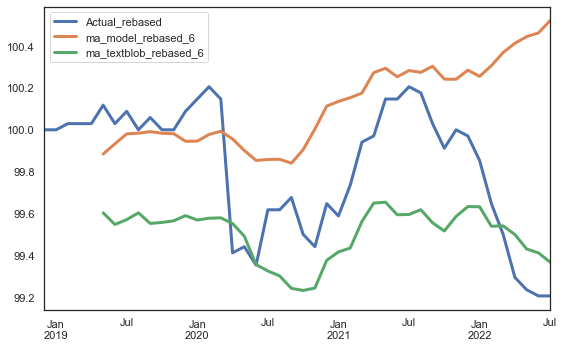

In [321]:
select = ['Actual_rebased', 'ma_textblob_rebased_6', 'ma_model_rebased_6']
df_2018_ma[df_2018_ma.columns.intersection(select)].plot(lw=3, figsize=(8,5))

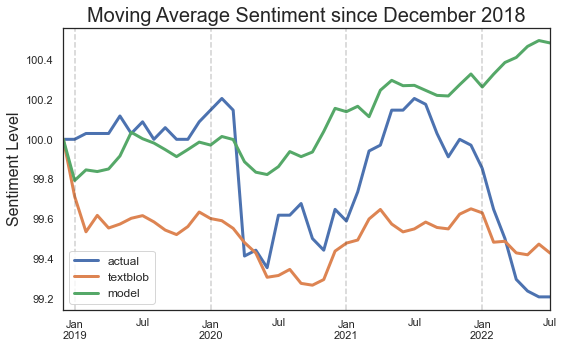

In [322]:

df_2018_ma[['Actual_rebased', 'ema_textblob_rebased_6', 'ema_model_rebased_6']].plot(lw=3, figsize=(8,5))
plt.title('Moving Average Sentiment since December 2018', fontsize=20)
plt.ylabel('Sentiment Level', fontsize=16)
plt.legend(['actual', 'textblob', 'model'], loc='lower left', fontsize=12)
for year in range(2018,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

<AxesSubplot:>

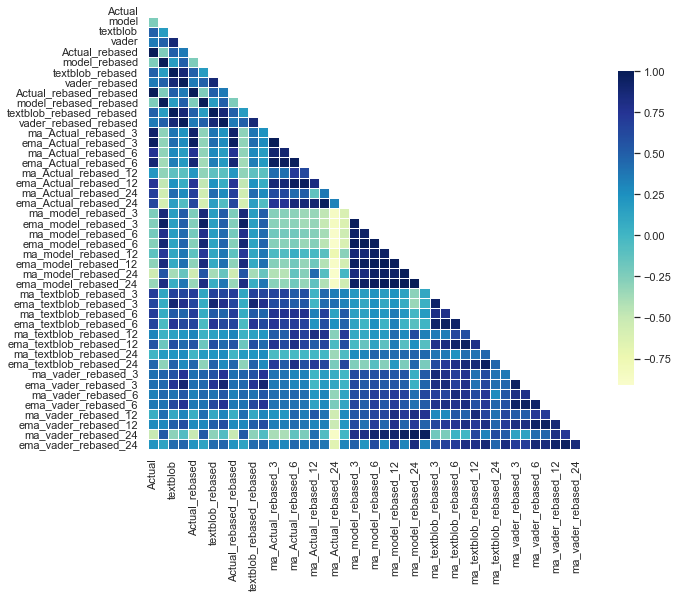

In [323]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_2018_ma.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 50, as_cmap=True)
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [324]:
type(corr)

pandas.core.frame.DataFrame

In [325]:
corr.Actual_rebased

Actual                      1.000000
model                      -0.239246
textblob                    0.491313
vader                       0.351666
Actual_rebased              1.000000
model_rebased              -0.239246
textblob_rebased            0.491313
vader_rebased               0.351666
Actual_rebased_rebased      1.000000
model_rebased_rebased      -0.239246
textblob_rebased_rebased    0.491313
vader_rebased_rebased       0.351666
ma_Actual_rebased_3         0.923872
ema_Actual_rebased_3        0.959685
ma_Actual_rebased_6         0.749248
ema_Actual_rebased_6        0.873747
ma_Actual_rebased_12        0.208435
ema_Actual_rebased_12       0.738390
ma_Actual_rebased_24        0.672165
ema_Actual_rebased_24       0.619687
ma_model_rebased_3         -0.240950
ema_model_rebased_3        -0.258365
ma_model_rebased_6         -0.202930
ema_model_rebased_6        -0.269018
ma_model_rebased_12        -0.122592
ema_model_rebased_12       -0.300065
ma_model_rebased_24        -0.548381
e

<AxesSubplot:>

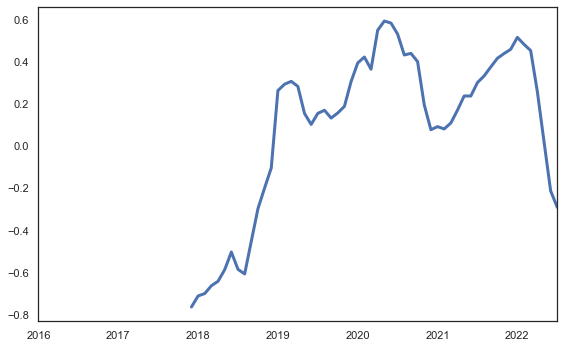

In [326]:
s1 = df_all_ma['Actual_rebased']
s2 = df_all_ma['model_rebased']
s1.rolling(24).corr(s2).plot(figsize = (8,5), lw=3)

In [327]:
df_all_ma[['ma_Actual_rebased_6','ma_textblob_rebased_6']].rolling(12).corr(pairwise=True)

ma_Actual_rebased_6  ma_textblob_rebased_6
2016-01-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-02-29 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-03-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-04-30 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-05-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-06-30 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-07-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-08-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-09-30 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-10-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-11-30 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2016-12-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2017-01-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2017-02-28 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2017-03-31 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2017-04-30 ma_Actual_rebased_6                    NaN                    NaN
           ma_textblob_rebased_6                  NaN                    NaN
2017-05-31 ma_Actual_rebased_6               1.000000              -0.850085
           ma_textblob_rebased_6            -0.850085               1.000000
2017-06-30 ma_Actual_rebased_6               1.000000              -0.889115
           ma_textblob_rebased_6            -0.889115               1.000000
2017-07-31 ma_Actual_rebased_6               1.000000              -0.787863
           ma_textblob_rebased_6            -0.787863               1.000000
2017-08-31 ma_Actual_rebased_6               1.000000              -0.690079
           ma_textblob_rebased_6            -0.690079               1.000000
2017-09-30 ma_Actual_rebased_6               1.000000              -0.524982
           ma_textblob_rebased_6            -0.524982               1.000000
2017-10-31 ma_Actual_rebased_6               1.000000              -0.298801
           ma_textblob_rebased_6            -0.298801               1.000000
2017-11-30 ma_Actual_rebased_6               1.000000              -0.285095
           ma_textblob_rebased_6            -0.285095               1.000000
2017-12-31 ma_Actual_rebased_6               1.000000              -0.539395
           ma_textblob_rebased_6            -0.539395               1.000000
2018-01-31 ma_Actual_rebased_6               1.000000              -0.606587
           ma_textblob_rebased_6            -0.606587               1.000000
2018-02-28 ma_Actual_rebased_6               1.000000              -0.648157
           ma_textblob_rebased

In [328]:
#sns.pairplot(df_2018_ma)

NameError: name 'x' is not defined

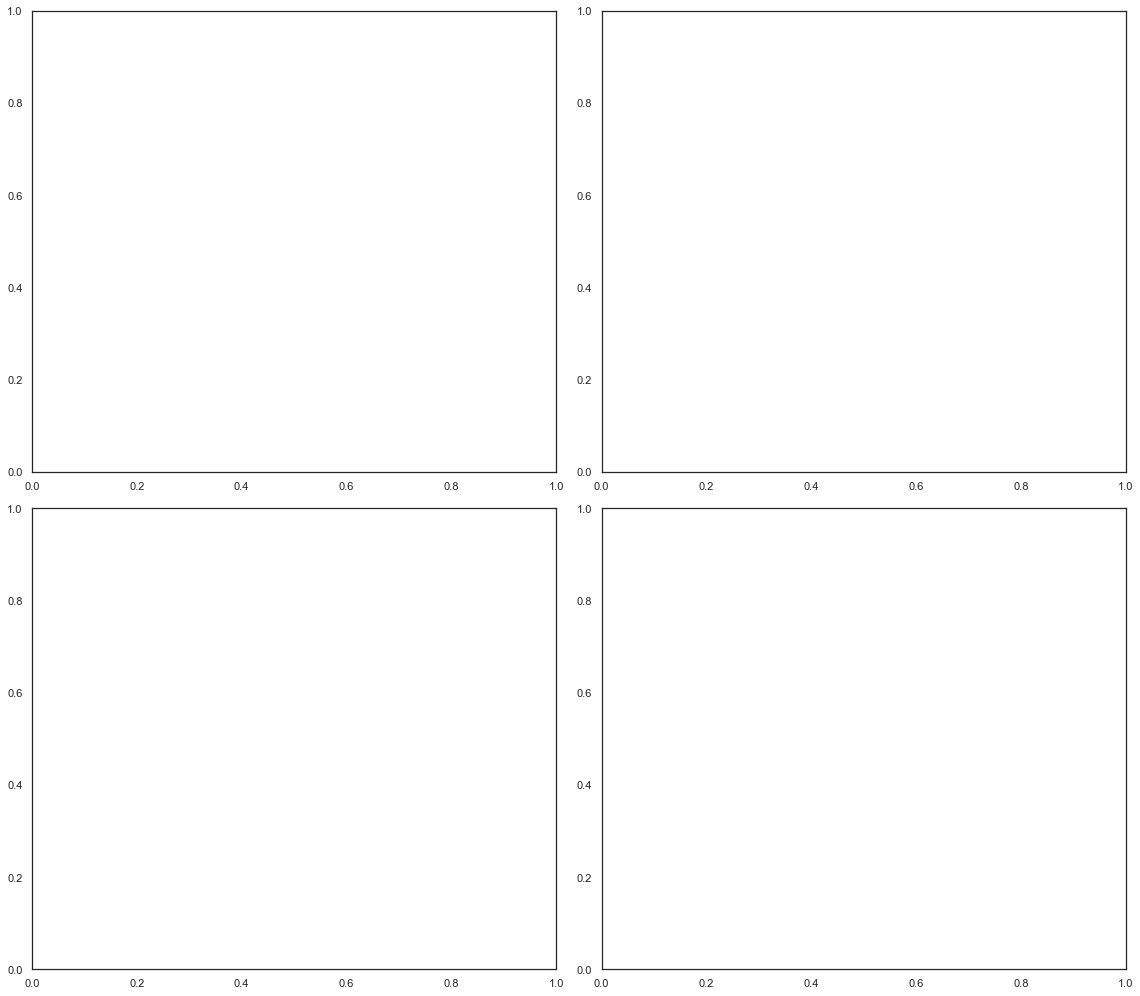

In [329]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()